# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
#importing all the necessary libraries

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [270]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [271]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [272]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [273]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

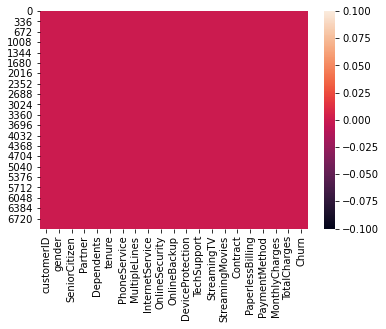

In [274]:
sn.heatmap(df.isnull())

From the above we can see that there are no Null values

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [276]:
df.shape

(7043, 21)

In [277]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [278]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [279]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

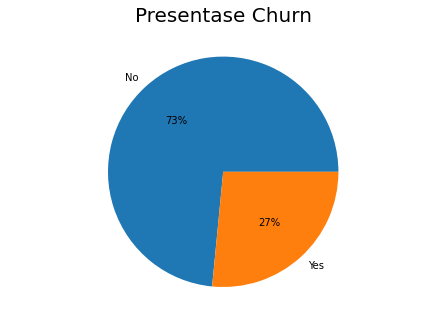

In [280]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Presentase Churn", fontsize=20)
plt.show()


In [281]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [282]:
df.gender = df.gender.fillna('unknown')

In [283]:
df.drop(['customerID'],axis=1,inplace=True)

In [284]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [285]:
df.SeniorCitizen = df.SeniorCitizen.fillna('unknown')

In [286]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [287]:
df.Partner = df.Partner.fillna('unknown')

In [288]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [289]:
df.Dependents = df.Dependents.fillna('unknown')

In [290]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [291]:
df.tenure = df.tenure.fillna('unknown')

In [292]:
df.tenure.dtype

dtype('int64')

In [293]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

In [294]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [295]:
df.PhoneService = df.PhoneService.fillna('unknown')

In [296]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [297]:
df.MultipleLines = df.MultipleLines.fillna('unknown')

In [298]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [299]:
df.InternetService = df.InternetService.fillna('unknown')

In [300]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [301]:
df.OnlineSecurity = df.OnlineSecurity.fillna('unknown')

In [302]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [303]:
df.OnlineBackup = df.OnlineBackup.fillna('unknown')

In [304]:
df.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [305]:
df.DeviceProtection = df.DeviceProtection.fillna('unknown')

In [306]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [307]:
df.TechSupport = df.TechSupport.fillna('unknown')

In [308]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [309]:
df.StreamingTV = df.StreamingTV.fillna('unknown')

In [310]:
df.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [311]:
df.StreamingMovies = df.StreamingMovies.fillna('unknown')

In [312]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [313]:
df.Contract = df.Contract.fillna('unknown')

In [314]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [315]:
df.PaperlessBilling = df.PaperlessBilling.fillna('unknown')

In [316]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [317]:
df.PaymentMethod = df.Contract.fillna('unknown')

In [318]:
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [319]:
df.MonthlyCharges = df.MonthlyCharges.fillna('unknown')

In [320]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [321]:
df.TotalCharges.value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
4146.05     1
1461.45     1
375.25      1
3229.4      1
4891.5      1
Name: TotalCharges, Length: 6531, dtype: int64

In [322]:
df.TotalCharges = df.TotalCharges.fillna('unknown')

In [323]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [324]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [325]:
df.Churn = df.Churn.fillna('unknown')

In [326]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [328]:
df.dropna(inplace = True)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [330]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [331]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='gender'>

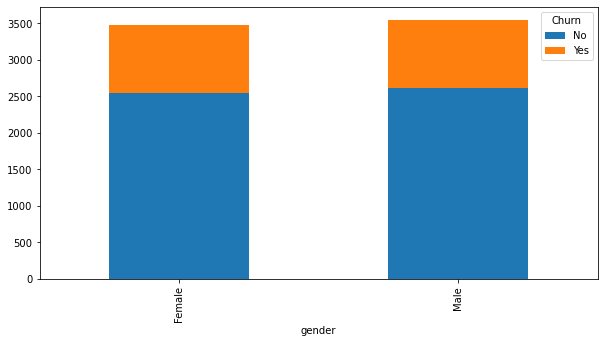

In [332]:
df.groupby(["gender", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='SeniorCitizen'>

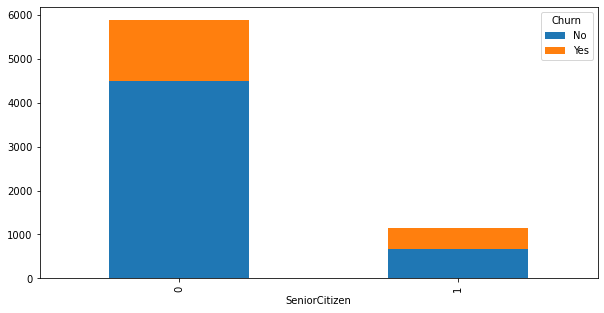

In [333]:
df.groupby(["SeniorCitizen", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='Partner'>

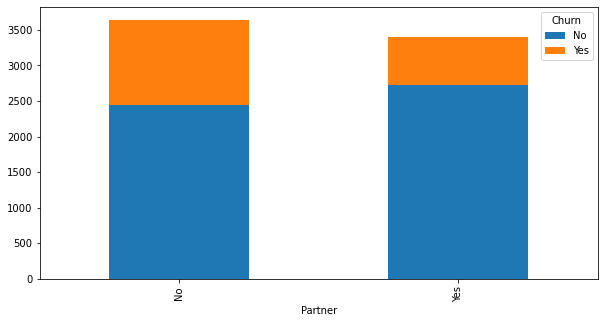

In [334]:
df.groupby(["Partner", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='Dependents'>

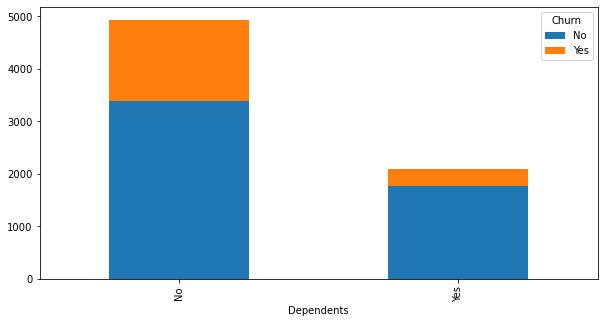

In [335]:
df.groupby(["Dependents", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='tenure'>

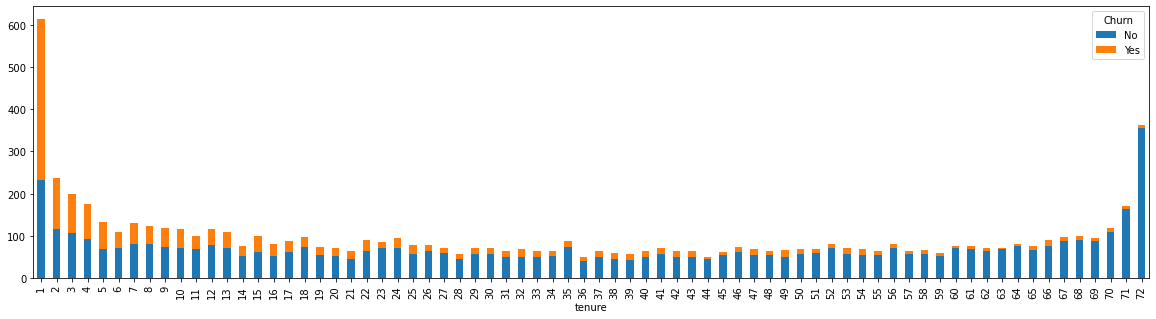

In [336]:
df.groupby(["tenure", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5)) 

<AxesSubplot:xlabel='PhoneService'>

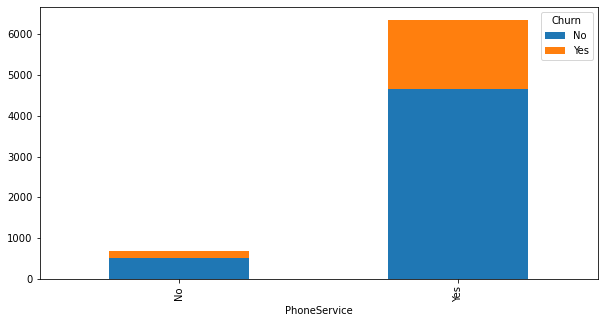

In [337]:
df.groupby(["PhoneService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='MultipleLines'>

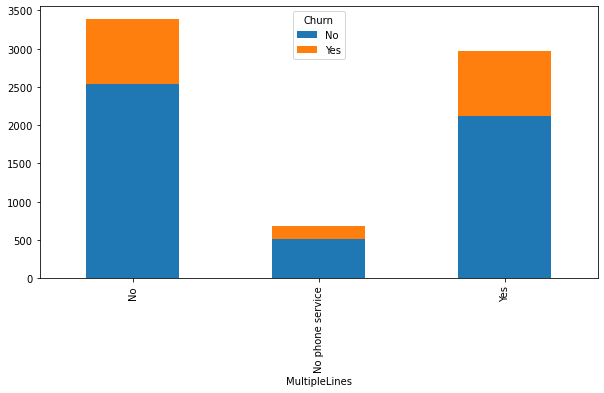

In [338]:
df.groupby(["MultipleLines", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='InternetService'>

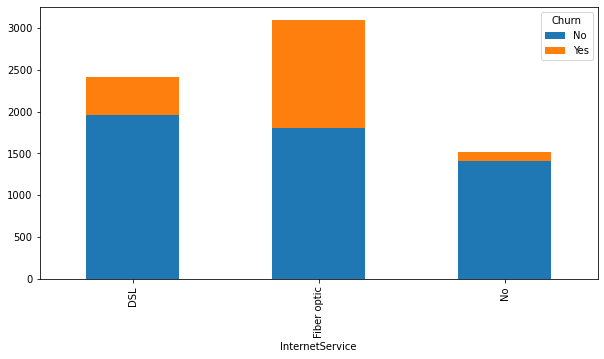

In [339]:
df.groupby(["InternetService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='OnlineSecurity'>

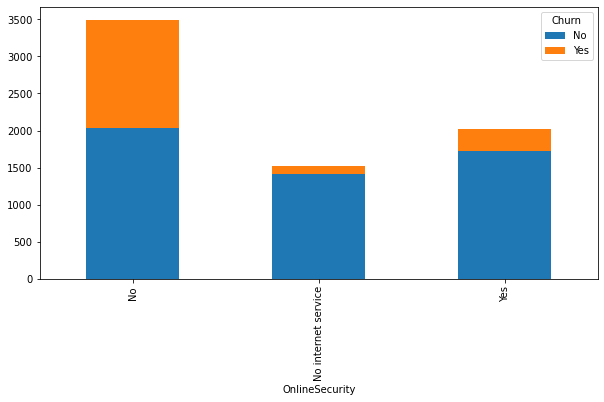

In [340]:
df.groupby(["OnlineSecurity", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='OnlineBackup'>

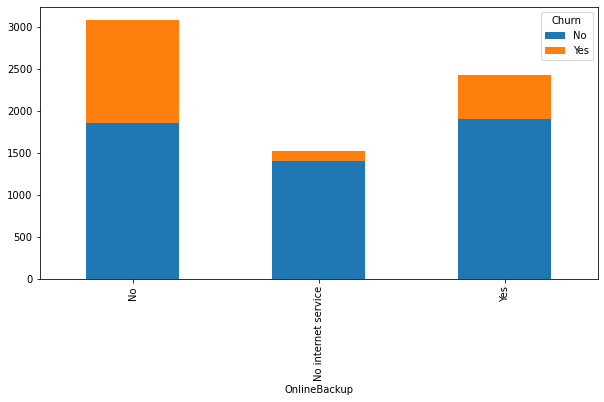

In [341]:
df.groupby(["OnlineBackup", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='DeviceProtection'>

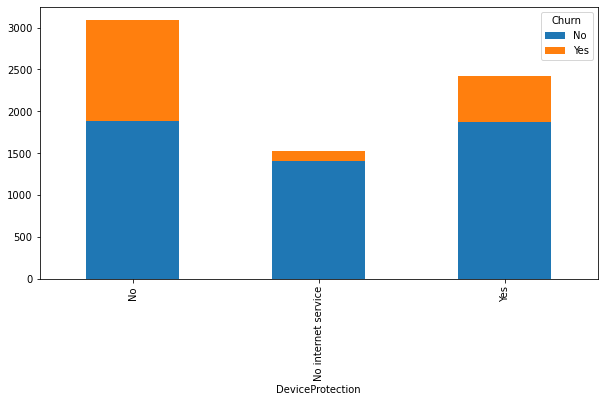

In [342]:
df.groupby(["DeviceProtection", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='TechSupport'>

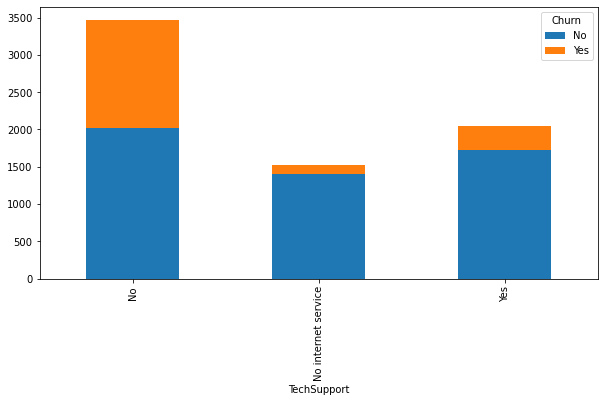

In [343]:
df.groupby(["TechSupport", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='StreamingTV'>

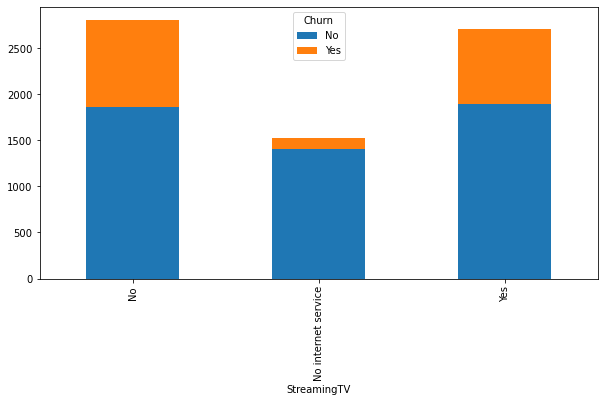

In [344]:
df.groupby(["StreamingTV", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='StreamingMovies'>

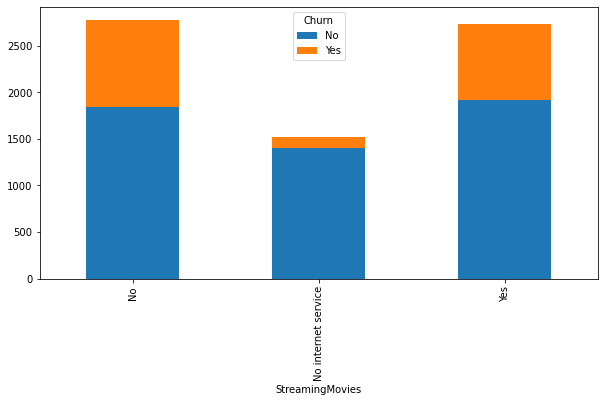

In [345]:
df.groupby(["StreamingMovies", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='Contract'>

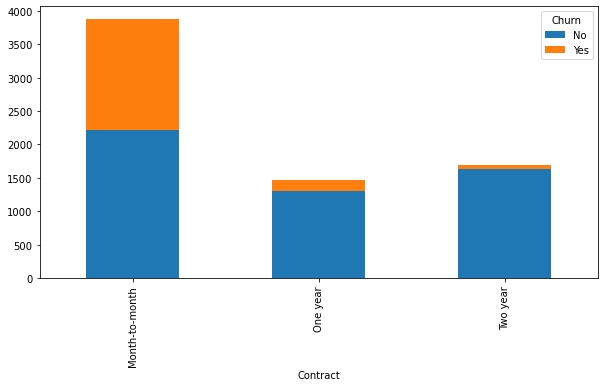

In [346]:
df.groupby(["Contract", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='PaperlessBilling'>

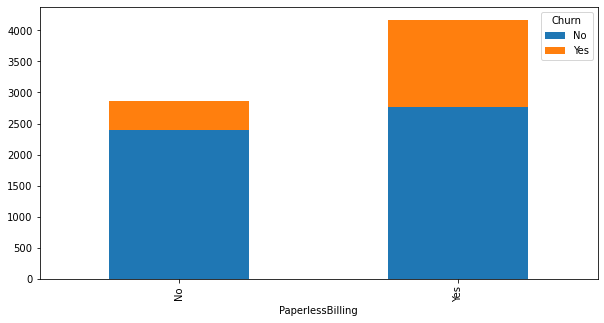

In [347]:
df.groupby(["PaperlessBilling", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='PaymentMethod'>

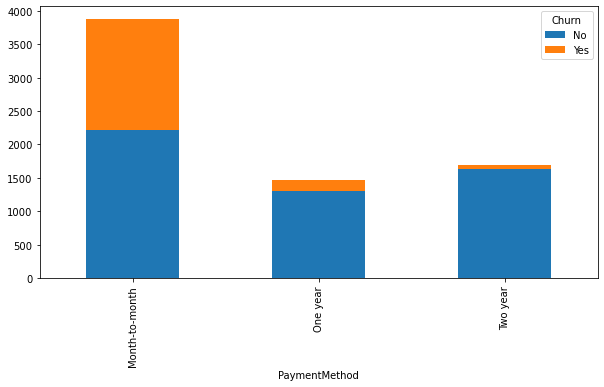

In [348]:
df.groupby(["PaymentMethod", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

<AxesSubplot:xlabel='MonthlyCharges'>

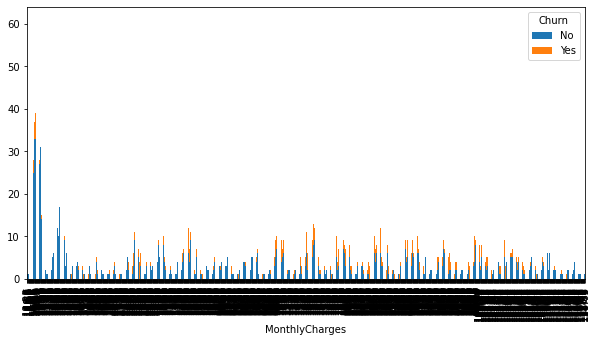

In [349]:
df.groupby(["MonthlyCharges", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5)) 

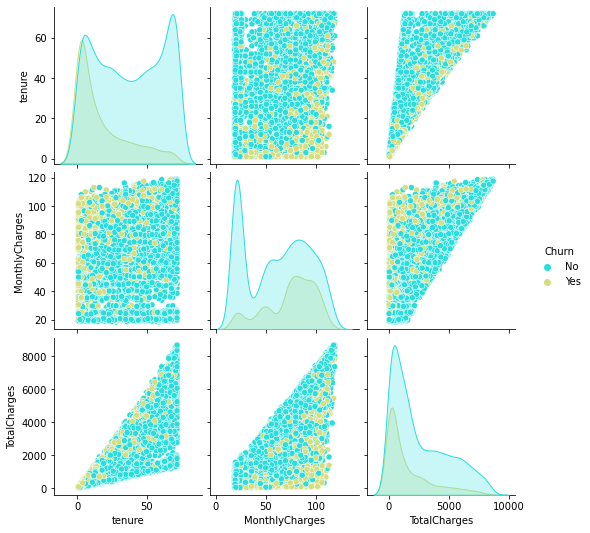

In [350]:
temp_cols = df.drop("SeniorCitizen",axis = 1)
sn.pairplot(temp_cols,hue='Churn',palette='rainbow')

# Encoding

In [351]:
df.gender = df.gender.map({'Female':0,'Male':1, 'unknown':2});

In [352]:
df.gender.value_counts()

1    3549
0    3483
Name: gender, dtype: int64

In [353]:
df.Partner = df.Partner.map({'No':0,'Yes':1})

In [354]:
df.Partner.value_counts();

In [355]:
df.Dependents = df.Dependents.map({'No':0,'Yes':1, 'unknown':2})

In [356]:
df.PhoneService = df.PhoneService.map({'No':0,'Yes':1,'No phone service':2})

In [357]:
df.MultipleLines = df.MultipleLines.map({'No':0,'Yes':1, 'No phone service':2})

In [358]:
df.InternetService = df.InternetService.map({'No':0,'Fiber optic':1, 'DSL':2, 'Digital Subscriber Line':3})

In [359]:
df.OnlineSecurity = df.OnlineSecurity.map({'No':0,'Yes':1, 'No internet service':2})

In [360]:
df.OnlineBackup = df.OnlineBackup.map({'No':0,'Yes':1, 'No internet service':2})

In [361]:
df.DeviceProtection = df.DeviceProtection.map({'No':0,'Yes':1, 'No internet service':2});

In [362]:
df.TechSupport = df.TechSupport.map({'No':0,'Yes':1, 'No internet service':2});

In [363]:
df.StreamingTV = df.StreamingTV.map({'No':0,'Yes':1, 'No internet service':2});

In [364]:
df.StreamingMovies = df.StreamingMovies.map({'No':0,'Yes':1, 'No internet service':2});

In [365]:
df.Contract = df.Contract.map({'Month-to-month':0,'One year':1, 'Two year':2})

In [366]:
df.PaperlessBilling = df.PaperlessBilling.map({'No':0,'Yes':1});

In [367]:
df.PaymentMethod = df.PaymentMethod.map({'Electronic check':0,'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3, 'Bank transfer':4, 'Credit card':5})


In [368]:
df.Churn = df.Churn.map({'No':0,'Yes':1});

In [369]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,NaN,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,NaN,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,NaN,53.85,108.15,1
3,1,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,NaN,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,NaN,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,NaN,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,NaN,103.20,7362.90,0
7040,0,0,1,1,11,0,2,2,1,0,0,0,0,0,0,1,NaN,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,NaN,74.40,306.60,1


In [370]:
df.drop(['PaymentMethod'],axis=1,inplace=True)

In [371]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,53.85,108.15,1
3,1,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,2,2,1,0,0,0,0,0,0,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,74.40,306.60,1


In [372]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# Removing the Outliers using the Z-Score Method

In [373]:
from scipy.stats import zscore

In [374]:
threshold=3
z=np.abs(zscore(df))

In [375]:
df_new=df[(z<3).all(axis=1)]

In [376]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,99.65,820.50,1
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,2,2,2,2,2,2,2,1,21.15,1419.40,0
7038,1,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,74.40,306.60,1


In [377]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df_new.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

df=df_new.copy()

Shape of the dataframe before removing outliers:  (7032, 19)
Shape of the dataframe after removing outliers:  (6352, 19)
Percentage of data loss post outlier removal:  9.670079635949943


# Checking the Correlation

In [378]:
df.corr

<bound method DataFrame.corr of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
4          0              0        0           0       2             1   
5          0              0        0           0       8             1   
6          1              0        0           1      22             1   
...      ...            ...      ...         ...     ...           ...   
7037       0              0        0           0      72             1   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1        

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

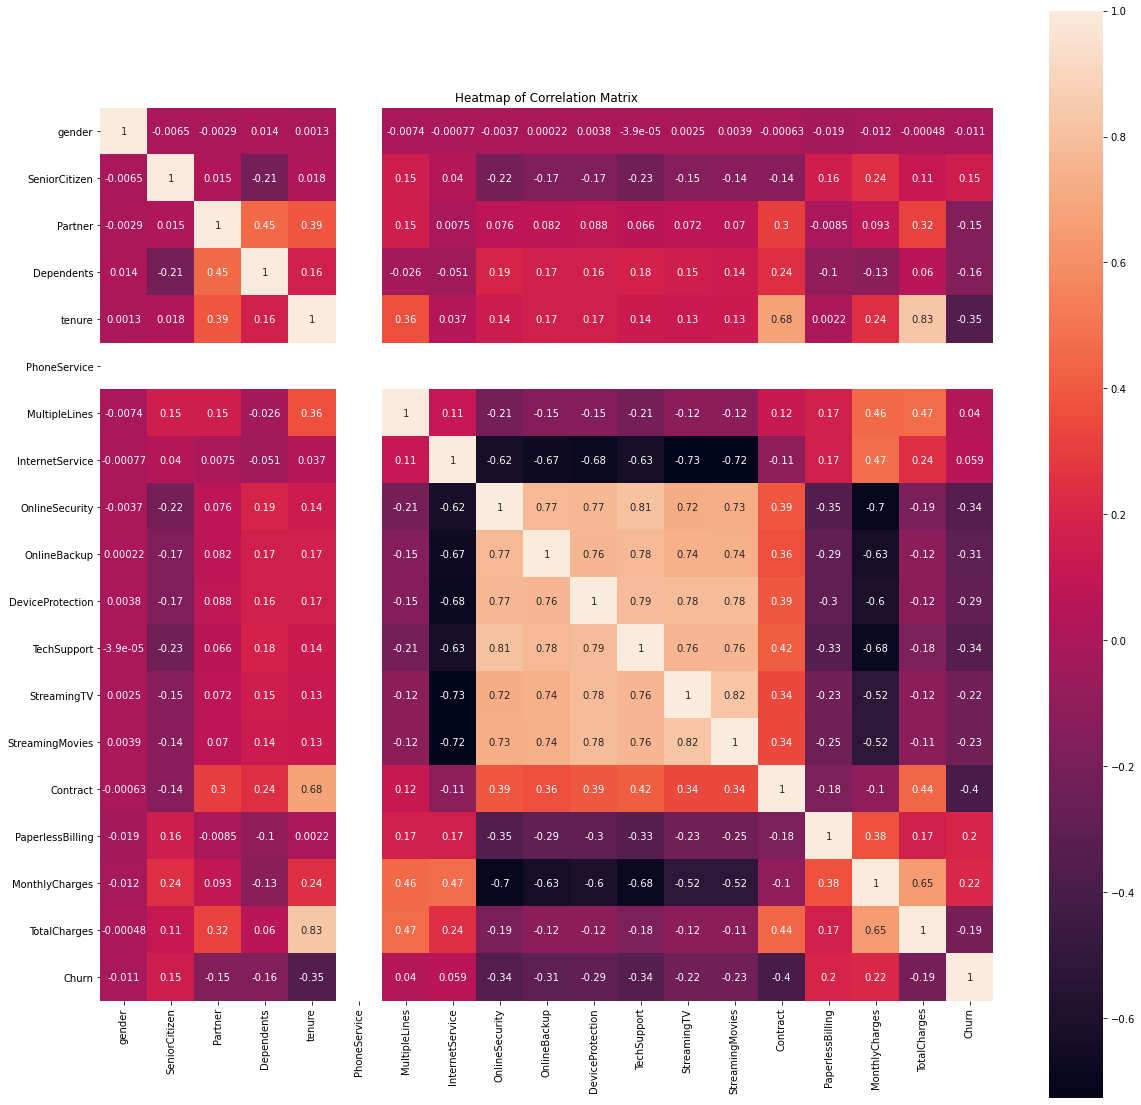

In [380]:
corr = df.corr()
f, ax = plt.subplots(figsize =(20,20))
sn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square = True, ax = ax, annot = True)
plt.title('Heatmap of Correlation Matrix')

# Creating the Data frames(X,Y)

In [381]:
x= df.drop('Churn',axis=1)
y= df['Churn']

In [382]:
x.shape

(6352, 18)

In [383]:
#Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0.993097,-0.441965,-0.971440,-0.652054,0.061633,0.0,-0.936223,1.35076,0.304570,-1.027914,0.237131,-0.926153,-1.110353,-1.114369,0.372688,-1.213093,-0.338074,-0.205102
1,0.993097,-0.441965,-0.971440,-0.652054,-1.240225,0.0,-0.936223,1.35076,0.304570,0.232814,-1.021230,-0.926153,-1.110353,-1.114369,-0.827168,0.824339,-0.439927,-0.970074
2,-1.006951,-0.441965,-0.971440,-0.652054,-1.240225,0.0,-0.936223,-0.04755,-0.921432,-1.027914,-1.021230,-0.926153,-1.110353,-1.114369,-0.827168,0.824339,0.113693,-0.951394
3,-1.006951,-0.441965,-0.971440,-0.652054,-0.996127,0.0,1.068121,-0.04755,-0.921432,-1.027914,0.237131,-0.926153,0.181398,0.178975,-0.827168,0.824339,1.064868,-0.664167
4,0.993097,-0.441965,-0.971440,1.533616,-0.426564,0.0,1.068121,-0.04755,-0.921432,0.232814,-1.021230,-0.926153,0.181398,-1.114369,-0.827168,0.824339,0.718240,-0.179378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,-1.006951,-0.441965,-0.971440,-0.652054,1.607590,0.0,-0.936223,-1.44586,1.530573,1.493542,1.495493,1.528646,1.473149,1.472320,1.572545,0.824339,-1.514311,-0.406979
6348,0.993097,-0.441965,1.029399,1.533616,-0.345198,0.0,1.068121,1.35076,0.304570,-1.027914,0.237131,0.301246,0.181398,0.178975,0.372688,0.824339,0.576960,-0.161729
6349,-1.006951,-0.441965,1.029399,1.533616,1.607590,0.0,1.068121,-0.04755,-0.921432,0.232814,0.237131,-0.926153,0.181398,0.178975,0.372688,0.824339,1.181506,2.145364
6350,0.993097,2.262622,1.029399,-0.652054,-1.158859,0.0,1.068121,-0.04755,-0.921432,-1.027914,-1.021230,-0.926153,-1.110353,-1.114369,-0.827168,0.824339,0.235260,-0.884853


# Modelling

In [386]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Linear Regression Model

In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [395]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [396]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[613  92]
 [122 126]]


In [397]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       705
           1       0.58      0.51      0.54       248

    accuracy                           0.78       953
   macro avg       0.71      0.69      0.70       953
weighted avg       0.77      0.78      0.77       953



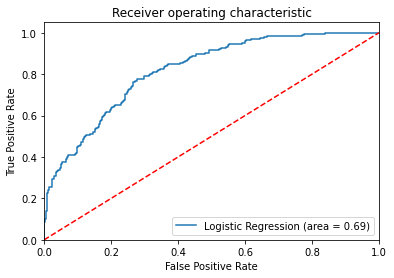

In [399]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Thus we have got the Linear regressiopn Model Having the Accuracy of about 70%

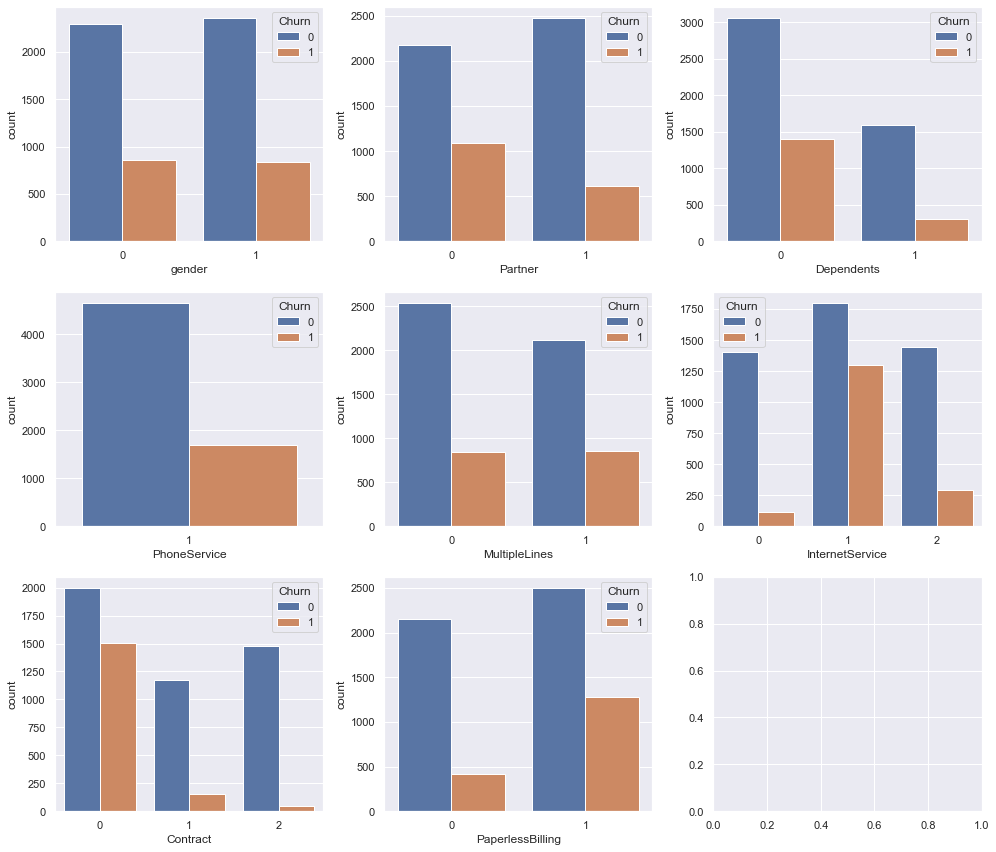

In [402]:
sn.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sn.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sn.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sn.countplot(data=df, x='Dependents', hue='Churn', ax=ax[0][2])
sn.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sn.countplot(data=df, x='MultipleLines', hue='Churn', ax=ax[1][1])
sn.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sn.countplot(data=df, x='Contract', hue='Churn', ax=ax[2][0])
sn.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()


# Saving The Best Model

In [ ]:
import joblib
joblib.dump(Churn,"Churn_Project.pkl")